In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Hitters.csv').dropna()

In [3]:
Y = np.log(np.array(data['Salary']))
X = np.array(data[['Years','RBI','PutOuts','Hits','Walks','Runs']])
splits = 6
kf = KFold(n_splits=splits)

In [4]:
max_tree_size = 11
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.5, random_state=0)
MSE_CV_list = np.zeros([max_tree_size - 1, splits])
MSE_test_list = np.zeros([max_tree_size - 1, splits])
MSE_train_list = np.zeros([max_tree_size - 1, splits])
tree_size_list = []
for tree_size in range(1,max_tree_size,1):
    reg = DecisionTreeRegressor(max_depth=tree_size)
    split_count = 0
    for train_index, val_index in kf.split(X_train):
        reg.fit(X_train[train_index], Y_train[train_index])
        Y_pred_val = reg.predict(X_train[val_index])
        Y_pred_test = reg.predict(X_test)
        Y_pred_train = reg.predict(X_train[train_index])
        MSE_CV_list[tree_size - 1, split_count] = np.sum((Y_train[val_index] - Y_pred_val)**2)/len(Y_pred_val)
        MSE_test_list[tree_size - 1, split_count] = np.sum((Y_test - Y_pred_test)**2)/len(Y_pred_test)
        MSE_train_list[tree_size - 1, split_count] = np.sum((Y_train[train_index] - Y_pred_train)**2)/len(Y_pred_train)
        split_count += 1
    tree_size_list.append(tree_size)

In [5]:
def mean_var(mat):
    mean_list = np.zeros(len(mat))
    var_list = np.zeros(len(mat))
    for i in range(len(mat)):
        mean_list[i] = np.mean(mat[i])
        var_list[i] = np.var(mat[i])
    return mean_list, var_list
    
CV_error, CV_var = mean_var(MSE_CV_list)
test_error, test_var = mean_var(MSE_test_list)
train_error, train_var = mean_var(MSE_train_list)

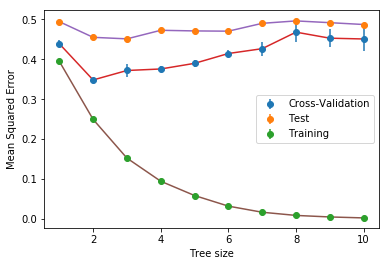

In [6]:
plt.errorbar(tree_size_list, CV_error, CV_var, fmt='o', label='Cross-Validation')
plt.errorbar(tree_size_list, test_error, test_var, fmt='o', label='Test')
plt.errorbar(tree_size_list, train_error, train_var, fmt='o', label='Training')
plt.plot(tree_size_list, CV_error)
plt.plot(tree_size_list, test_error)
plt.plot(tree_size_list, train_error)
plt.xlabel('Tree size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [7]:
data2 = np.loadtxt('reprocessed.hungarian.data') #quitar el .txt si el archivo no lo tiene
aa = data2[:,-1] != 0. 
data2[:,-1][aa] = np.round(1)

In [8]:
Y2 = np.int_(np.array(data2[:,-1]).reshape(-1,1))
X2 = np.array(data2[:,:-1])

In [9]:
max_tree_size2 = 12
X2_test, X2_train, Y2_test, Y2_train = train_test_split(X2, Y2, test_size=0.5)
E_CV_list2 = np.zeros([max_tree_size2 - 1, splits])
E_test_list2 = np.zeros([max_tree_size2 - 1, splits])
E_train_list2 = np.zeros([max_tree_size2 - 1, splits])
tree_size_list2 = []
for tree_size in range(1,max_tree_size2):
    clf = DecisionTreeClassifier(max_depth=tree_size)
    split_count = 0
    for train_index, val_index in kf.split(X2_train):
        clf.fit(X2_train[train_index], Y2_train[train_index])
        Y2_pred_val = clf.predict(X2_train[val_index])
        Y2_pred_test = clf.predict(X2_test)
        Y2_pred_train = clf.predict(X2_train[train_index])
        cm_CV = confusion_matrix(Y2_train[val_index], Y2_pred_val)
        cm_test = confusion_matrix(Y2_test, Y2_pred_test)
        cm_train = confusion_matrix(Y2_train[train_index], Y2_pred_train)
        E_CV_list2[tree_size - 1, split_count] = (cm_CV[0,0] + cm_CV[1,1])/(cm_CV[0,0] + cm_CV[0,1] + cm_CV[1,0] + cm_CV[1,1])
        E_test_list2[tree_size - 1, split_count] = (cm_test[0,0] + cm_test[1,1])/(cm_test[0,0] + cm_test[0,1] + cm_test[1,0] + cm_test[1,1])
        E_train_list2[tree_size - 1, split_count] = (cm_train[0,0] + cm_train[1,1])/(cm_train[0,0] + cm_train[0,1] + cm_train[1,0] + cm_train[1,1])
        split_count += 1
    tree_size_list2.append(tree_size)

In [10]:
CV_error2, CV_var2 = mean_var(E_CV_list2)
test_error2, test_var2 = mean_var(E_test_list2)
train_error2, train_var2 = mean_var(E_train_list2)

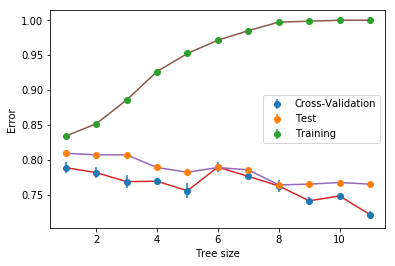

In [11]:
plt.errorbar(tree_size_list2, CV_error2, CV_var2, fmt='o', label='Cross-Validation')
plt.errorbar(tree_size_list2, test_error2, test_var2, fmt='o', label='Test')
plt.errorbar(tree_size_list2, train_error2, train_var2, fmt='o', label='Training')
plt.plot(tree_size_list2, CV_error2)
plt.plot(tree_size_list2, test_error2)
plt.plot(tree_size_list2, train_error2)
plt.xlabel('Tree size')
plt.ylabel('Error')
plt.legend()
plt.show()